# Homework 2
# Snow Hydrology
### Clinton Alden

In [33]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [34]:
# Read in SoS obs
sos_file = "../data/sos_full_dataset_30min.nc"
sos_dataset = xr.open_dataset(sos_file)
sos_dataset_daily = sos_dataset.resample(time="1D").mean()

# Read in precip data
precip_dataset = pd.read_csv('../data/kettle_ponds_precip.csv')

# Ensure the precip dataset has a DateTime index
precip_dataset['date'] = pd.to_datetime(precip_dataset['date'])
precip_dataset.set_index('date', inplace=True)

In [35]:
df_butte = pd.read_csv('./butte_snotel.csv')
df_butte['datetime'] = pd.to_datetime(df_butte['datetime'])
df_butte.set_index('datetime', inplace=True)
df_butte['PRECIPITATION'] = df_butte['PRECIPITATION']*10
df_butte['SWE'] = df_butte['SWE']*10

In [36]:
df_scofield = pd.read_csv('./schofield_snotel.csv')
df_scofield['datetime'] = pd.to_datetime(df_scofield['datetime'])
df_scofield.set_index('datetime', inplace=True)
df_scofield['PRECIPITATION'] = df_scofield['PRECIPITATION']*10
df_scofield['SWE'] = df_scofield['SWE']*10

### Problem 1

#### Using the observations of precipitation and the snow pillow data at Kettle Ponds and the two SNOTEL stations (see Module 2 labs), we are going to investigate the mass balance and snow accumulation at sites in the East River Valley.

#### A. Plot timeseries of snow water equivalent from the four snow pillows at Kettle Ponds. Plot a separate time series of cumulative precipitation at Kettle Ponds. Add to your two plots the SWE and precipitation data from two Snotel Stations located nearby.

/Users/clintonalden/miniforge3/envs/snow_hydro/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


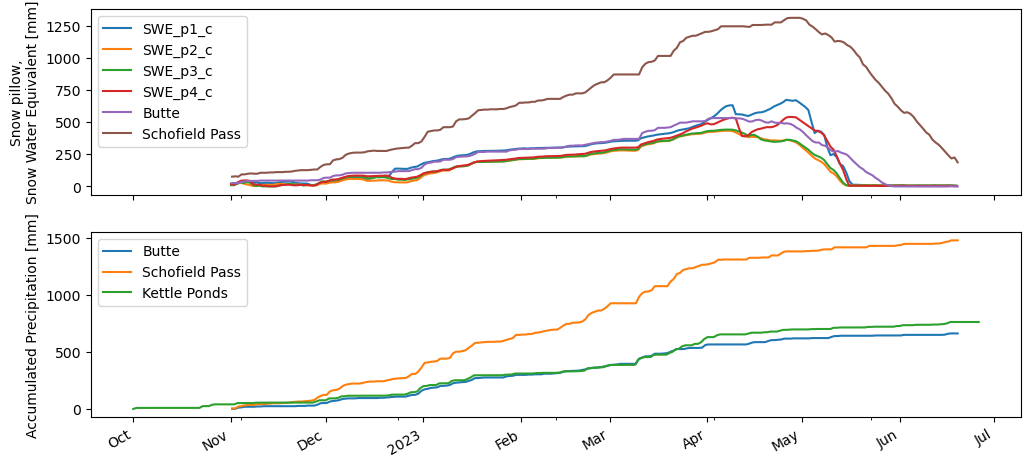

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(12,6), sharex=True)
sos_dataset_daily['SWE_p1_c'].plot(ax=axes[0], label='SWE_p1_c')
sos_dataset_daily['SWE_p2_c'].plot(ax=axes[0], label='SWE_p2_c')
sos_dataset_daily['SWE_p3_c'].plot(ax=axes[0], label='SWE_p3_c')
sos_dataset_daily['SWE_p4_c'].plot(ax=axes[0], label='SWE_p4_c')
axes[0].plot(df_butte.index, df_butte['SWE'], label='Butte')
axes[0].plot(df_scofield.index, df_scofield['SWE'], label='Schofield Pass')

axes[1].plot(df_butte.index, df_butte['PRECIPITATION'].cumsum(), label='Butte')
axes[1].plot(df_scofield.index, df_scofield['PRECIPITATION'].cumsum(), label='Schofield Pass')
precip_dataset['acc_prec'].plot(ax=axes[1], label='Kettle Ponds')

axes[0].legend()
axes[1].legend()
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[0].set_ylabel("Snow pillow,\nSnow Water Equivalent [mm]")
axes[1].set_ylabel("Accumulated Precipitation [mm]")
# axes[0].set_xlim(dt.datetime(2022,11,1), dt.datetime(2023,3,27))
plt.show()

#### B. Calculate the seasonal maximum SWE from one of the Kettle Ponds (not Snotel) snow pillows. Calculate the cumulative precipitation up until the date of your identified maximum SWE. Calculate the percentage of the cumulative precipitation accounted for by the max SWE value.

In [39]:
# find max SWE
kp_max_swe = sos_dataset_daily['SWE_p3_c'].max().item()

# find date of max SWE
kp_max_swe_date = sos_dataset_daily['SWE_p3_c'].idxmax().values
kp_max_swe_date = pd.Timestamp(kp_max_swe_date)
print('date of max SWE: ' + str(kp_max_swe_date))

# find precip on date of max SWE
kp_precip_max_swe = precip_dataset.loc[kp_max_swe_date, 'acc_prec']

# calculate percentage of precip from SWE
perc_precip_swe = kp_max_swe / kp_precip_max_swe
print('percent of cumulative precip accounted for by max SWE: ' + str(np.round(perc_precip_swe*100,1)))

date of max SWE: 2023-04-08 00:00:00
percent of cumulative precip accounted for by max SWE: 67.8


#### C. Write out the snow mass balance equation from lecture. Given your calculations for part B, what terms in the mass balance do you think are most likely to account for the disparity between cumulative precipitation and maximum SWE? How certain do you think our estimates of cumulative precipitation and maximum SWE are?

$\frac{\partial SWE}{\partial t} = Snowfall - Sublimation - Melt + Redistribution  $

Sublimation may account for some of the difference between max SWE and accumulated precipitation although it is unlikely sublimation was that large. There also may have been some snow melt from $SW_{in}$ and $G$ in October and early November while the ground was warmer and the sun angle higher. I believe are estimates of SWE are not the most certain given the strange differences in SWE and melt between two sets of two snow pillows in early April. Precipitation should be quite certain so long as there was an adequate wind shield around the precipitation sensor to prevent undercatch.

#### D. Discuss which factors of the mass balance are most likely to vary spatially. Reference your plots from A. Is there more variability between sites further away? Or are the four snow pillows at Kettle Ponds as different as the two SNOTEL sites from elsewhere in the watershed?

Snowfall is likely to vary the most spatially as precipiation patterns can change with elevation and orographic effects. The variability between Schofield Pass and the other snow pillows demonstrates this as Schofield Pass has more SWE and a higher elevation. The variability between the Butte site and the four Kettle Ponds pillows is minimal except what looks to potentially be instrument error with two of the pillows in the Spring.

#### E. Summer researchers at the Rocky Mountain National Biological Lab in the Upper East River Valley want to start their research as soon as possible. To access the lab, they need to drive down a forest service road that is currently snowed in. The forest service opens the road when the snow melts and disappears. Using the long term records at the SNOTEL sites, and (optionally) any other information you like, predict when the snow will be gone (and the road clear) in 2025.

Using the Butte SNOTEL as a proxy for the RMBL access road, I predict the road will be snow-free by roughly May 16. The median melt out date at Butte is May 21 and I estimate the road melts out at roughly the same time. Butte is currently at 109 percent of median SWE although the CPC favors below average precipitation and slightly above average temperatures for the February-March-April period so I predict Butte will melt out ~5 days before median.

#### F. Following lab 2-3, calculate snow density at one Kettle Ponds tower using 30-minute data (i.e. mimic what we did in lab 2-3, but do not resample the data to daily time steps). For the time period January 1-15, 2023, plot snow density and snow depth. Explain what patterns you see in the two time series.

In [66]:
# calculate density
sos_density_c3 = (sos_dataset['SWE_p3_c'])/sos_dataset['SnowDepth_c']

(200.0, 350.0)

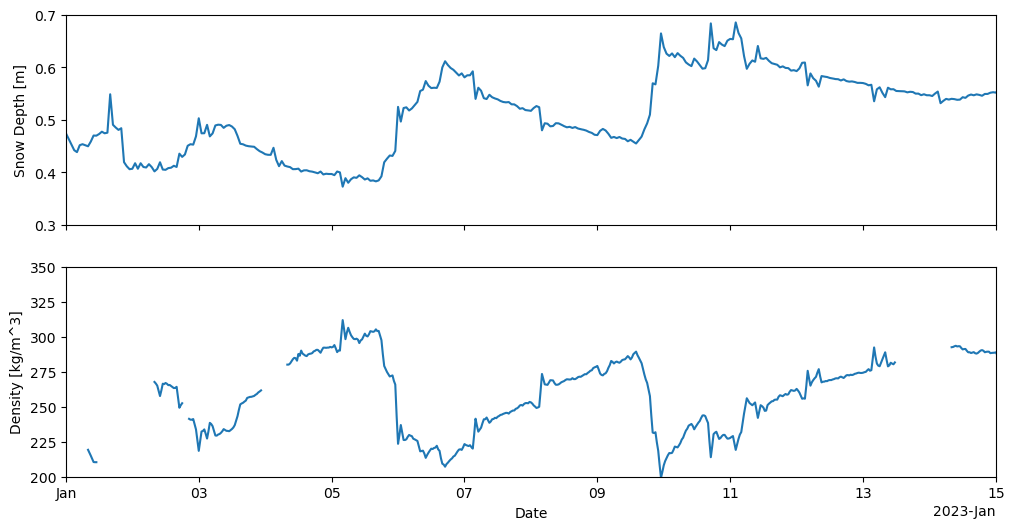

In [73]:
fig, ax = plt.subplots(2,1,figsize=(12,6), sharex=True)

sos_dataset['SnowDepth_c'].plot(ax=ax[0], label='Snow Depth')
ax[0].set_xlabel('')
ax[0].set_ylabel('Snow Depth [m]')
ax[0].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-01-15'))
ax[0].set_ylim(0.3,0.7)

sos_density_c3.plot(ax=ax[1], label='Density')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Density [kg/m^3]')
ax[1].set_ylim(200,350)


In the snow depth plot, we see a series of significant storms increasing snow depth quickly followed by a slower decline in depth from compaction. The density plot is the inverse where storms decrease bulk density and then density rises slowly afterwards due to compaction.

#### In snow models, a simple exponential decay equation is used to predict the compaction of snow over time (e.g. Essery et al., 2013, https://www.sciencedirect.com/science/article/abs/pii/S0309170812002011). Such a model takes the form:

density(t) = max_density + (initial_density - max_density)*e^(-t / tau_p)

#### where max_density is a constant, the maximum possible snow density (e.g. 300-400 kg/m^3), initial_density is the starting density of the snowpack, and tau_p is a decay constant, e.g. 180,000 seconds. Identify a short time period between January 1–15 during which you observe a single instant of decaying density/snow depth (should be between 24 and 72 hours long). Apply this equation to the short time series of snow density. Plot the observed density and the predicted density time series, and tweak the parameters until your model has a decent fit for your selected event.

In [133]:
snowdensity_c = sos_density_c3.sel(time=slice('20230107 0000', '20230109 0000'))
time = pd.to_datetime(snowdensity_c.time.values)
time_seconds = (time - pd.Timestamp('2023-01-07 00:00')) // pd.Timedelta('1s')

rho_i = 215 #kg/m^3
rho_max = 300 #kg/m^3
tau_p = 140000 # s
t = time_seconds # s, 48 hours

rho_predicted = rho_max + (rho_i - rho_max)*(np.exp(-t/tau_p))

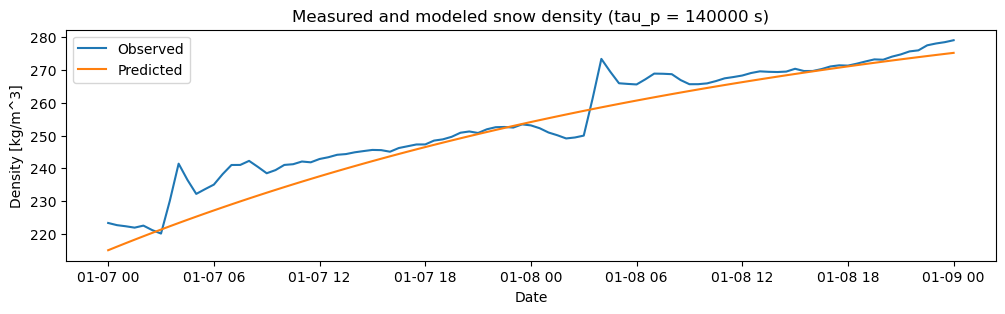

In [134]:
fig, ax = plt.subplots(1,1,figsize=(12,3), sharex=True)

ax.plot(time, snowdensity_c, label='Observed')
ax.plot(time, rho_predicted, label='Predicted')

ax.set_xlabel('Date')
ax.set_ylabel('Density [kg/m^3]')
ax.set_title(f'Measured and modeled snow density (tau_p = {tau_p} s)')
ax.legend()

### Problem 2

On your reading of Lundquist et al. 2024 "Sublimation of Snow"".

In Figure 3B, SWE measured on four different snow pillows show significant and diverging change on the morning of December 22. What caused the SWE signals to diverge? Based on this answer, what do you think is a shortcoming of SNOTEL measurement sites? Describe the ideal area for a SNOTEL site (think about topography, weather/wind conditions). Maximum 8 sentences.

The SWE signals diverged at this time because of wind deposited snow at the UW tower. The horizontal snow flux peaked very high on December 22 showing this horizontal transport of snow. Susceptibility to wind redistribution is a shortcoming of some SNOTEL sites. The ideal SNOTEL location would be located in a wind shelter location well away from trees. Tree interception of snow can also be a significant source of SWE error. The site would also need to located on relatively flat ground with minimal vegetation in the immediate vicinity. This would provide the highest quality SWE data although it would not be representative of the surrounding landscape if this site was one of the few non-forested locations. In general, measuring representative SWE is very difficult.